# Handwritten Digit Classifiation

## Importing Libraries and Datasets

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

#### Here we have used MNIST dataset for the classifications
it has set of 70000 images with 784 features

In [2]:
MNIST=fetch_openml('MNIST_784')

### initialising the variables for data and targets

In [3]:
X , Y =MNIST['data'],MNIST['target']

In [4]:
X.shape

(70000, 784)

### Shape Visualisation

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [6]:
some_digit=X[3600]

### Converting the resolution into 28x28 to display the image.

In [7]:
some_digit_image=some_digit.reshape(28,28)

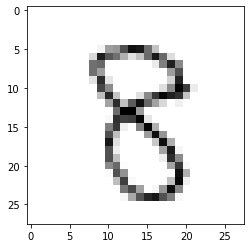

In [8]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')

(0.0, 1.0, 0.0, 1.0)

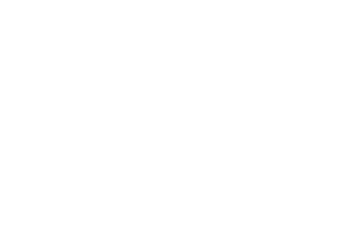

In [9]:
plt.axis('off')

In [10]:
Y[3600]

'8'

### Separating the training and testing data

In [11]:
X_train , X_test =X[:6000] , X[6000:7000]

In [12]:
Y_train , Y_test =Y[:6000], Y[6000:7000]

### Shuffling the datasets 

In [13]:
shuffle_index=np.random.permutation(6000)

In [14]:
X_train , Y_train =X_train[shuffle_index],Y_train[shuffle_index]

### Converting string into integers

In [15]:
Y_train=Y_train.astype(np.int8)

In [16]:
Y_test=Y_test.astype(np.int8)

# Creating a 2 detector

In [17]:
Y_train_2=(Y_train==2)

In [18]:
Y_train_2

array([False, False, False, ..., False,  True, False])

In [19]:
Y_test_2=(Y_test==2)

In [20]:
Y_test_2

array([False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False,

## Model building 

In [21]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(tol=0.1 ,solver='lbfgs')
clf.fit(X_train,Y_train_2)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [22]:
clf.predict([some_digit])

array([False])

## Cross Validation 

In [23]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(clf,X_train,Y_train_2,cv=3,scoring='accuracy')

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [24]:
a.mean()

0.9546666666666667

### Mean =0.9571666  So output having 95.71% accuracy

## Cross validation predictions

In [25]:
from sklearn.model_selection import cross_val_predict
Y_train_pred=cross_val_predict(clf,X_train,Y_train_2,cv=3)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [26]:
Y_train_pred

array([False, False, False, ..., False,  True, False])

# Calculating confusion metrix

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(Y_train_2,Y_train_pred)

array([[5272,  147],
       [ 125,  456]], dtype=int64)

In [33]:
confusion_matrix(Y_train_2,Y_train_2)# Ideal condition

array([[5419,    0],
       [   0,  581]], dtype=int64)

# Precision and Recall :
precision and recall helps us to check the model accuracy reality

In [34]:
from sklearn.metrics import precision_score ,recall_score

In [35]:
precision_score(Y_train_2,Y_train_pred)

0.7562189054726368

In [36]:
recall_score(Y_train_2,Y_train_pred)

0.7848537005163512

#### So we got the precision and recall score which shows , in real the accuracy is less than the predicted accuracy

# f1 score : 
                  it is harmonic mean of precision and recall

In [37]:
from sklearn.metrics import f1_score

In [38]:
f1_score(Y_train_2,Y_train_pred)

0.7702702702702703

# Curve plotting 

# Pression Recall Curve

In [60]:
from sklearn.metrics import precision_recall_curve
Y_scores=cross_val_predict(clf,X_train,Y_train_2,cv=3,method='decision_function')
precisions , recalls , thresholds =precision_recall_curve(Y_train_2,Y_scores )

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [59]:
Y_scores

array([  -4.36657724,  -81.63961801, -129.1796326 , ..., -214.94048062,
         71.01803076,  -94.52886913])

In [54]:
precisions

array([0.09683333, 0.75621891, 1.        ])

In [55]:
recalls

array([1.       , 0.7848537, 0.       ])

In [56]:
thresholds

array([False,  True])

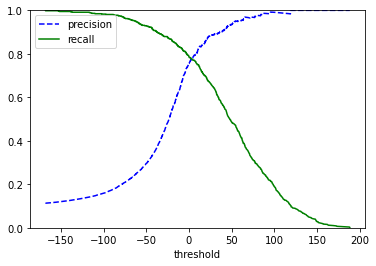

In [61]:
plt.plot(thresholds,precisions[:-1],'b--',label='precision')
plt.plot(thresholds,recalls[:-1],'g-',label='recall')
plt.xlabel('threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()
